# LABORATORIO 2 - SIS421
## Estudiante: Jhamil Crespo Rejas
## Carrera: Ingenieria en Ciencias de la Computacion

In [1]:
#importacion de librerias
import os #para el manejo de archivos
import torch #para el manejo de tensores
from torch.utils.data import Dataset, DataLoader, random_split #para el manejo de los datos
from torchvision import transforms #para las transformaciones de las imagenes
from PIL import Image #para el manejo de las imagenes
import matplotlib.pyplot as plt #para la visualizacion de las imagenes
import random #para la generacion de numeros aleatorios
import numpy as np #para el manejo de matrices
import torch.nn as nn #para la definicion de redes neuronales

## Dataset Personalizado
* Creamos una clase personalizada para el Dataset a la que le pasaremos la direccion del repositorio de donde cargara las imagenes y la transformacion que se le aplicara a las imagenes y los inicializamos en el constructor.
* Establecemos los nombres de las clases y su valor.
* inicializamos los arrays `self.images[]` en donde se almacenaran las rutas completas para cada imagen y su etiqueta,  y `self.targets[]` en donde tambien se almacenaran las etiquetas (eso lo usaremos para hacer graficos).
* Se recorre cada clase en el diccionario `self.classes` y para cada clase se obtiene la ruta del directorio correspondiente. Se recorren todos los nombres de archivos en ese directorio y se construye la ruta completa de cada imagen y se añade a `self.images` junto con su etiqueta, tambien se guardan las etiquetas en `self.targets`.
* Con el metodo `__len__` obtenemos el numero total de imagenes en el dataset
* El metodo `__getitem__` nos devuelve la imagen y la etiqueta correspondiente dado un indice. Dentro del metodo abrimos la imagen y le aolicamos la transformacion. 

In [5]:
# Clase personalizada para el Dataset
class DatasetPersonalizado(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = {
            'AmorSeco': 0,
            'Boldo': 1,
            'Charanguillo': 2,
            'Ortiga': 3,
            'Perejil': 4
        }
        self.images = []
        self.targets = []
        for cls_name, label in self.classes.items():
            cls_path = os.path.join(root_dir, cls_name)
            for img_name in os.listdir(cls_path):
                img_path = os.path.join(cls_path, img_name)
                self.images.append((img_path, label))
                self.targets.append(label)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, label = self.images[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

## Transform
* Redimensiona cada imagen a un tamaño de 256x256 píxeles, asegurando que todas las imagenes del dataset tengan el mismo tamaño.
* Convertimos la imagen en un tensor de Pytorch.
* Normalizamos los valores de los píxeles de la imagen. La normalización se realiza restando la media y dividiendo por la desviación estándar para cada canal de color (Rojo, Verde, Azul). En este caso, estás usando una media de 0.5 y una desviación estándar de 0.5 para cada canal.

In [7]:
# Definir las transformaciones: Escalar y Normalizar
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

## Creacion del Dataset
* Creamos una instancia de la clase *DatasetPersonalizado* pasandole la ruta del directorio en donde se encuentran las imagenes y el *transform*.
* Dividimos el dataset en **80% train** y **20% test**.
* Creamos los **Dataloader** para los subconjuntos de entrenamiento y prueba. Tanto para el entrenamiento y prueba tenemos un `batch_size=32`. 
* Verificamos que los datos se hayan cargado correctamente.

In [8]:

# Crear el dataset
dataset = DatasetPersonalizado(root_dir=r"C:\Users\Jhamil\Desktop\Dataset10mil", transform=transform)

# Dividir el dataset en 80% train y 20% test
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Crear los DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [9]:
# Tamaño de los datasets
print(f'Tamaño del set de entrenamiento: {len(train_dataset)}')
print(f'Tamaño del set de prueba: {len(test_dataset)}')

Tamaño del set de entrenamiento: 8038
Tamaño del set de prueba: 2010


## Pruebas con el dataset
### Verificamos que las imagenes esten con sus etiquetas correctas

In [8]:
# Clases del dataset
classes = ('AmorSeco', 'Boldo', 'Charanguillo', 'Ortiga', 'Perejil')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.88235295..0.6862745].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.92156863..0.92941177].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.8117647].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.92941177..0.9529412].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.81960785..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.92156863..0.913725

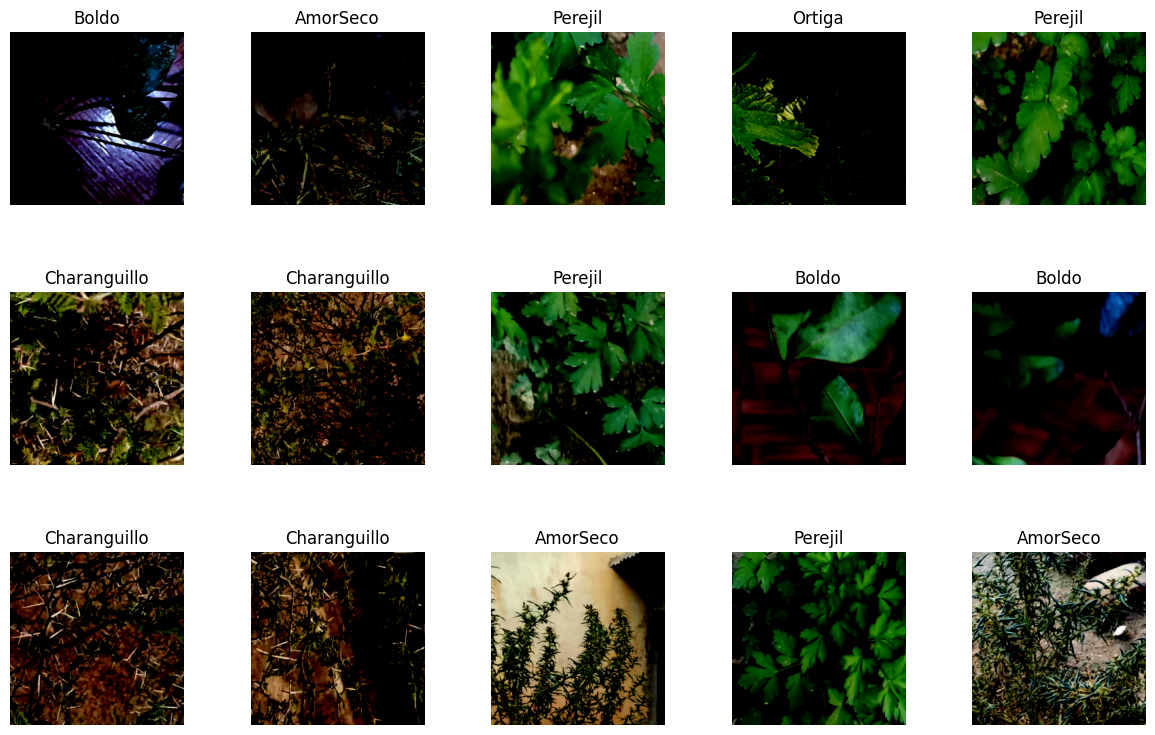

In [9]:
# Función para deshacer la normalización y mostrar las imágenes correctamente
def imshow(img):
    # Cambiar las dimensiones del tensor (C, H, W) a (H, W, C)
    img = img.permute(1, 2, 0)
    plt.imshow(img)
    plt.axis('off')

# Parámetros de la visualización
r, c = 3, 5  # 3 filas, 5 columnas para un total de 15 imágenes
plt.figure(figsize=(c*3, r*3))

# Mostrar imágenes aleatorias del conjunto de entrenamiento
for row in range(r):
    for col in range(c):
        index = c*row + col
        plt.subplot(r, c, index + 1)
        ix = random.randint(0, len(train_dataset) - 1)  # Seleccionar una imagen aleatoria del dataset de entrenamiento
        img, label = train_dataset[ix]  # Obtener la imagen y su etiqueta
        imshow(img)  # Mostrar la imagen
        plt.title(classes[label])  # Mostrar la clase correspondiente como título

# Ajustar espacio entre las imágenes
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


### Verificamos que hay un equilibrio en la Distribucion de Clases

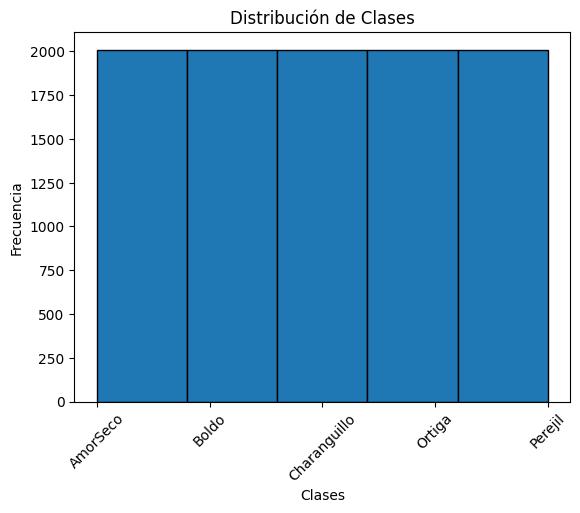

In [10]:
# Obtener las etiquetas correspondientes a los índices de entrenamiento
train_labels = np.array(dataset.targets)
# Nombres de las clases
class_names = list(dataset.classes.keys())

# Distribución de clases - Mostrar histograma de las primeras 30,000 imágenes (o menos si hay menos en el set)
plt.hist(train_labels[:30000], bins=len(dataset.classes), edgecolor='black')
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45)
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.title('Distribución de Clases')
plt.show()

In [11]:
# Obtener las etiquetas del subset de entrenamiento
train_labels = [dataset.targets[idx] for idx in train_dataset.indices]

# Contar cuántas imágenes hay por clase
unique, counts = np.unique(train_labels, return_counts=True)

# Nombres de las clases
class_names = list(dataset.classes.keys())

# Mostrar el número de imágenes por clase con sus nombres
class_counts = dict(zip(class_names, counts))
print(class_counts)


{'AmorSeco': 1601, 'Boldo': 1590, 'Charanguillo': 1601, 'Ortiga': 1623, 'Perejil': 1623}


### Creamos un modelo personalizado simple para realizar pruebas
* Inicializamos en el constructor las capas de la red neuronal. 
1. `self.fc1`: Definimos una capa totalmente conectada con 256x256x3 entradas (correspondientes a una imagen de 256x256 píxeles con 3 canales de color) y 50 neuronas en la capa oculta.
2. `self.relu`: Definimos la funcion de activacion ReLU que introduce no linealidad en el modelo, lo que permite a la red neuronal aprender patrones complejos en los datos.
3. `self.fc2`: Definimos otra capa totalmente conectada con 50 entradas (salida de la capa oculta) y `num_classes` salidas (que en este caso sera 5).
* En el metodo `forward` aplanamos la entrada en un vector unidimensional ya que eso es lo que espera la red y luego le vamos aplicando las capas de la red neuronal.

In [12]:
# Definir el MLP con al menos 50 neuronas en una capa oculta
class ModeloPersonalizado(nn.Module):
    def __init__(self, num_classes):
        super(ModeloPersonalizado, self).__init__()
        self.fc1 = nn.Linear(256 * 256 * 3, 50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Aplanar
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

Verificamos las capas del modelo

In [13]:
# Ejemplo de cómo instanciar y mover el modelo a la GPU si está disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Instanciar el modelo, definir el criterio de pérdida y el optimizador
model = ModeloPersonalizado(num_classes=5).to(device)
print(model)

ModeloPersonalizado(
  (fc1): Linear(in_features=196608, out_features=50, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=50, out_features=5, bias=True)
)


verificamos que el modelo nos de una salida adecuada

In [14]:
# Crear una entrada de prueba con un tamaño compatible con el modelo
test_input = torch.randn((64, 256*256*3)).cuda()

# Pasar la entrada por el modelo
test_output = model(test_input)

# Imprimir la forma de la salida
print(test_output.shape)

torch.Size([64, 5])


Verificamos cuantas imagenes tiene el conjunto de entrenamiento por clase

In [15]:
# Obtener las etiquetas del subset de entrenamiento
train_labels = [dataset.targets[idx] for idx in train_dataset.indices]

# Contar cuántas imágenes hay por clase
unique, counts = np.unique(train_labels, return_counts=True)

# Nombres de las clases
class_names = list(dataset.classes.keys())

# Mostrar el número de imágenes por clase con sus nombres
class_counts = dict(zip(class_names, counts))
print(class_counts)

{'AmorSeco': 1601, 'Boldo': 1590, 'Charanguillo': 1601, 'Ortiga': 1623, 'Perejil': 1623}


### Definimos un Subset
Utilizaremos un dataset mas pequeño de 100 imagenes por planta (500 en total), para hacer las pruebas de entrenamiento

In [16]:
from collections import defaultdict

# Crear un diccionario para almacenar los índices seleccionados por clase
selected_indices = defaultdict(list)

# Seleccionar 100 imágenes por clase
for idx in train_dataset.indices:
    label = dataset.targets[idx]
    if len(selected_indices[label]) < 100:
        selected_indices[label].append(idx)

# Aplanar la lista de índices seleccionados
small_train_indices = [idx for indices in selected_indices.values() for idx in indices]

# Crear el subset más pequeño de entrenamiento
small_train_dataset = torch.utils.data.Subset(dataset, small_train_indices)

# Crear el DataLoader para el subset más pequeño
small_train_loader = DataLoader(small_train_dataset, batch_size=32, shuffle=True)

Verificamos que el dataset se haya cargado correctamente y que tenga 100 imagenes por clase

In [17]:
# Obtener las etiquetas del subset pequeño de entrenamiento
small_train_labels = [dataset.targets[idx] for idx in small_train_dataset.indices]

# Contar cuántas imágenes hay por clase
unique, counts = np.unique(small_train_labels, return_counts=True)

# Nombres de las clases
class_names = list(dataset.classes.keys())

# Mostrar el número de imágenes por clase con sus nombres
class_counts = dict(zip(class_names, counts))
print(class_counts)

{'AmorSeco': 100, 'Boldo': 100, 'Charanguillo': 100, 'Ortiga': 100, 'Perejil': 100}


Instanciamos un nuevo modelo y lo entrenamos con el nuevo dataset mas pequeño

In [55]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_small = ModeloPersonalizado(num_classes=5).to(device)

# Definir el criterio de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_small.parameters(), lr=0.001, weight_decay=1e-5)

Definimos una funcion para guardar el modelo

In [23]:
# Crear un directorio para almacenar los checkpoints
checkpoint_dir = r"C:\Users\Jhamil\Desktop\Checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

# Función para guardar el checkpoint
def save_checkpoint(epoch, model, optimizer, loss, path):
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss
    }, path)

Entrenamos el modelo con el nuevo dataset con solo 5 iteraciones para verificar que el modelo se entrene correctamente

In [25]:
# Entrenamiento
num_epochs = 5
for epoch in range(num_epochs):
    model_small.train()
    running_loss = 0.0

    for images, labels in small_train_loader:
        # Mover los datos a la GPU
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_small(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    if (epoch + 1) % 20 == 0:
        checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_small_epoch_{epoch+1}.pth')
        save_checkpoint(epoch, model_small, optimizer, running_loss, checkpoint_path)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(small_train_loader):.4f}')


Epoch [1/5], Loss: 6.6115
Epoch [2/5], Loss: 2.0900
Epoch [3/5], Loss: 0.7839
Epoch [4/5], Loss: 0.5928
Epoch [5/5], Loss: 0.3005


### Definimos un Subset de Validacion
Generamos un dataset pequeño de validacion con un total de 100 imagenes (20 por cada clase)

In [26]:
from collections import defaultdict

# Crear un diccionario para almacenar los índices seleccionados por clase para validación
selected_val_indices = defaultdict(list)

# Seleccionar 20 imágenes por clase para validación
for idx in test_dataset.indices:
    label = dataset.targets[idx]
    if len(selected_val_indices[label]) < 20 and idx not in small_train_indices:
        selected_val_indices[label].append(idx)

# Aplanar la lista de índices seleccionados
small_val_indices = [idx for indices in selected_val_indices.values() for idx in indices]

# Crear el subset más pequeño de validación
small_val_dataset = torch.utils.data.Subset(dataset, small_val_indices)

# Crear el DataLoader para el subset más pequeño de validación
small_val_loader = DataLoader(small_val_dataset, batch_size=32, shuffle=True)


Verificamos que el dataset de validacion se haya cargado correctamente y que tenga 20 imagenes por clase

In [28]:
# Obtener las etiquetas del subset pequeño de validación
small_val_labels = [dataset.targets[idx] for idx in small_val_dataset.indices]

# Contar cuántas imágenes hay por clase
unique, counts = np.unique(small_val_labels, return_counts=True)

# Nombres de las clases
class_names = list(dataset.classes.keys())

# Mostrar el número de imágenes por clase con sus nombres
class_counts = dict(zip(class_names, counts))
print(class_counts)

{'AmorSeco': 20, 'Boldo': 20, 'Charanguillo': 20, 'Ortiga': 20, 'Perejil': 20}


Relizamos un segundo entrenamiento en donde nos muestre el error y la presicion de validacion y entrenamiento en cada iteracion

In [34]:
# Entrenamiento 2
num_epochs = 5
for epoch in range(num_epochs):
    model_small.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in small_train_loader:
        # Mover los datos a la GPU
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_small(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calcular el número de predicciones correctas en el conjunto de entrenamiento
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calcular el accuracy en el conjunto de entrenamiento
    accuracy_train = 100 * correct_train / total_train

    # Fase de validación
    model_small.eval()
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in small_val_loader:
            # Mover los datos a la GPU
            images, labels = images.to(device), labels.to(device)
            outputs = model_small(images)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    # Calcular el accuracy en el conjunto de validación
    accuracy_val = 100 * correct_val / total_val

    if (epoch + 1) % 20 == 0:
        checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_small_epoch_{epoch+1}.pth')
        save_checkpoint(epoch, model_small, optimizer, running_loss, checkpoint_path)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(small_train_loader):.4f}, '
          f'Train Accuracy: {accuracy_train:.2f}%, Val Accuracy: {accuracy_val:.2f}%')

Epoch [1/5], Loss: 5.5247, Train Accuracy: 51.20%, Val Accuracy: 63.00%
Epoch [2/5], Loss: 2.0140, Train Accuracy: 75.40%, Val Accuracy: 65.00%
Epoch [3/5], Loss: 0.9681, Train Accuracy: 84.20%, Val Accuracy: 68.00%
Epoch [4/5], Loss: 1.1583, Train Accuracy: 86.60%, Val Accuracy: 69.00%
Epoch [5/5], Loss: 0.7527, Train Accuracy: 88.80%, Val Accuracy: 72.00%


Modificamos el entrenamiento para que ahora guarde el mejor modelo basandose en el accuracy de validacion

In [52]:
# Entrenamiento 3 mejor modelo
num_epochs = 40
best_val_accuracy = 0.0  # Inicializar el mejor accuracy de validación

for epoch in range(num_epochs):
    model_small.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in small_train_loader:
        # Mover los datos a la GPU
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_small(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calcular el número de predicciones correctas en el conjunto de entrenamiento
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calcular el accuracy en el conjunto de entrenamiento
    accuracy_train = 100 * correct_train / total_train

    # Fase de validación
    model_small.eval()
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in small_val_loader:
            # Mover los datos a la GPU
            images, labels = images.to(device), labels.to(device)
            outputs = model_small(images)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    # Calcular el accuracy en el conjunto de validación
    accuracy_val = 100 * correct_val / total_val

    # Guardar el modelo si el accuracy de validación mejora
    if accuracy_val > best_val_accuracy:
        best_val_accuracy = accuracy_val
        checkpoint_path = os.path.join(checkpoint_dir, 'best_model_small.pth')
        save_checkpoint(epoch, model_small, optimizer, running_loss, checkpoint_path)
        print(f'Model saved with Val Accuracy: {accuracy_val:.2f}%')

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(small_train_loader):.4f}, '
          f'Train Accuracy: {accuracy_train:.2f}%, Val Accuracy: {accuracy_val:.2f}%')

Model saved with Val Accuracy: 53.00%
Epoch [1/40], Loss: 6.6756, Train Accuracy: 47.60%, Val Accuracy: 53.00%
Model saved with Val Accuracy: 64.00%
Epoch [2/40], Loss: 1.7409, Train Accuracy: 73.20%, Val Accuracy: 64.00%
Model saved with Val Accuracy: 72.00%
Epoch [3/40], Loss: 0.7492, Train Accuracy: 83.40%, Val Accuracy: 72.00%
Epoch [4/40], Loss: 0.4169, Train Accuracy: 90.00%, Val Accuracy: 58.00%
Epoch [5/40], Loss: 0.5734, Train Accuracy: 87.40%, Val Accuracy: 67.00%
Epoch [6/40], Loss: 0.4053, Train Accuracy: 93.60%, Val Accuracy: 67.00%
Epoch [7/40], Loss: 0.1046, Train Accuracy: 96.80%, Val Accuracy: 69.00%
Epoch [8/40], Loss: 0.1054, Train Accuracy: 98.00%, Val Accuracy: 71.00%
Epoch [9/40], Loss: 0.0395, Train Accuracy: 99.00%, Val Accuracy: 69.00%
Epoch [10/40], Loss: 0.0230, Train Accuracy: 99.60%, Val Accuracy: 71.00%
Epoch [11/40], Loss: 0.0175, Train Accuracy: 99.80%, Val Accuracy: 70.00%
Epoch [12/40], Loss: 0.0132, Train Accuracy: 99.80%, Val Accuracy: 70.00%
Epoch [

Este entrenamiento nos hace ver que cuando el modelo llega a un punto en el que ya no mejora, por lo que seria adecuado detener el entrenamiento en ese punto con *early stoping*.

Le agregamos *early stoping* a nuestro entrenamiento, basado en el `loss`de entrenamiento.

In [56]:
# Entrenamiento con early stopping basado en el loss de entrenamiento
num_epochs = 40
best_val_accuracy = 0.0  # Inicializar el mejor accuracy de validación
patience = 5  # Número de épocas sin mejora para detener el entrenamiento
epochs_no_improve = 0  # Contador de épocas sin mejora
best_train_loss = float('inf')  # Inicializar el mejor loss de entrenamiento

for epoch in range(num_epochs):
    model_small.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in small_train_loader:
        # Mover los datos a la GPU
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_small(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calcular el número de predicciones correctas en el conjunto de entrenamiento
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calcular el accuracy y el loss en el conjunto de entrenamiento
    accuracy_train = 100 * correct_train / total_train
    train_loss = running_loss / len(small_train_loader)

    # Fase de validación
    model_small.eval()
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in small_val_loader:
            # Mover los datos a la GPU
            images, labels = images.to(device), labels.to(device)
            outputs = model_small(images)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    # Calcular el accuracy en el conjunto de validación
    accuracy_val = 100 * correct_val / total_val

    # Guardar el modelo si el accuracy de validación mejora
    if accuracy_val > best_val_accuracy:
        best_val_accuracy = accuracy_val
        checkpoint_path = os.path.join(checkpoint_dir, 'best_model_small.pth')
        save_checkpoint(epoch, model_small, optimizer, running_loss, checkpoint_path)
        print(f'Model saved with Val Accuracy: {accuracy_val:.2f}%')

    # Verificar si el loss de entrenamiento ha mejorado
    if train_loss < best_train_loss:
        best_train_loss = train_loss
        epochs_no_improve = 0  # Reiniciar el contador de épocas sin mejora
    else:
        epochs_no_improve += 1

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, '
          f'Train Accuracy: {accuracy_train:.2f}%, Val Accuracy: {accuracy_val:.2f}%')

    # Verificar si se debe detener el entrenamiento
    if epochs_no_improve >= patience:
        print(f'Early stopping triggered after {epoch+1} epochs')
        break

Model saved with Val Accuracy: 57.00%
Epoch [1/40], Loss: 7.1851, Train Accuracy: 49.80%, Val Accuracy: 57.00%
Model saved with Val Accuracy: 61.00%
Epoch [2/40], Loss: 1.6377, Train Accuracy: 80.40%, Val Accuracy: 61.00%
Model saved with Val Accuracy: 70.00%
Epoch [3/40], Loss: 0.9327, Train Accuracy: 87.00%, Val Accuracy: 70.00%
Epoch [4/40], Loss: 0.3179, Train Accuracy: 92.40%, Val Accuracy: 70.00%
Epoch [5/40], Loss: 0.2588, Train Accuracy: 94.20%, Val Accuracy: 70.00%
Epoch [6/40], Loss: 0.2621, Train Accuracy: 95.40%, Val Accuracy: 70.00%
Model saved with Val Accuracy: 72.00%
Epoch [7/40], Loss: 0.2006, Train Accuracy: 96.80%, Val Accuracy: 72.00%
Epoch [8/40], Loss: 0.1572, Train Accuracy: 97.60%, Val Accuracy: 62.00%
Epoch [9/40], Loss: 0.3008, Train Accuracy: 97.00%, Val Accuracy: 67.00%
Epoch [10/40], Loss: 0.1833, Train Accuracy: 96.60%, Val Accuracy: 62.00%
Epoch [11/40], Loss: 0.2219, Train Accuracy: 97.40%, Val Accuracy: 67.00%
Epoch [12/40], Loss: 0.0541, Train Accuracy

Podemos observar que se completo el entrenamiento a pesar de que el modelo en un punto ya no mejoraba la presicion de validacion, ya que el *early stoping* estaba basado en el `loss` de entrenamiento y este seguia bajando poco a poco. Por esto seria mejor basar el *early stoping* en el `accuracy` de validacion ya que es lo que nos interesa mejorar.

## Entrenamiento con el dataset completo
### Definimos un nuevo modelo
* Creamos un nuevo modelo para realizar el entrenamiento con el dataset completo aplicando Batch Normalization y Dropout.
#### Capas del modelo
- `nn.Linear(D_in, H)`: Definimos una capa totalmente conectada con 256x256x3 entradas (correspondientes a una imagen de 256x256 píxeles con 3 canales de color) y una salida de 128 neuronas en la capa oculta.
- `nn.BatchNorm1d(H)`: Aplicamos Batch Normalization para normalizar las activaciones de la capa oculta ayudando a estabilizar y acelerar el entrenamiento.
- `LeakyReLU`: Definimos la funcion de activacion LeakyReLU que introduce no linealidad en el modelo, lo que permite a la red neuronal aprender patrones complejos en los datos. Utilizamos esat funcion de activacion ya que es mas efectiva que la ReLU en algunos casos porque ayuda a mitigar el problema de unidades muertas (neuronas que nunca se activan), en este caso con una pendiente de **0.1** para los valores negativos.
- `nn.Dropout(0.5)`: Aplicamos Dropout para regularizar el modelo y prevenir el sobreajuste. Con una probabilidad de 0.5, se desactivan aleatoriamente la mitad de las neuronas de la capa oculta durante el entrenamiento.
- `nn.Linear(H, H)`: Definimos otra capa totalmente conectada que mantiene el mismo número de neuronas (128).
- Reptimos la secuencia de *Batch Normalization*, *LeakyReLU* y *Dropout*. Esto añade mas profundidad a la red y ayuda a aprender patrones mas complejos.
- `nn.Linear(H, D_out)`: Definimos lq capa de salida con `num_classes` salidas (que en este caso sera 5).

### Inicializamos el modelo
* Inicializamos el modelo y lo enviamos al dispositivo de hardware que estemos utilizando.
* Definimos la funcion de perdida `nn.CrossEntropyLoss()` para el problema de clasificacion multiclase.
* Definimos el optimizador `torch.optim.Adam` con una tasa de aprendizaje de 0.001 y un factor de decaimiento de 0.0001 lo que agrega mayor regularizacion al entrenamiento.	


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

# Definimos el modelo con Batch Normalization, Dropout y LeakyReLU
def build_model(D_in=256*256*3, H=128, D_out=5):
    return nn.Sequential(
        nn.Linear(D_in, H),
        nn.BatchNorm1d(H),
        nn.LeakyReLU(0.1),
        nn.Dropout(0.5),
        nn.Linear(H, H),
        nn.BatchNorm1d(H),
        nn.LeakyReLU(0.1),
        nn.Dropout(0.5),
        nn.Linear(H, D_out)
    ).cuda()

# Inicializar el modelo, criterio y optimizador
model = build_model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)


Definimos una funcion para calcular la presicion del modelo

In [12]:
# Función para calcular la precisión
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    return correct / labels.size(0)

Definimos una funcion para guardar los checkpoints del modelo

In [16]:
# Crear un directorio para almacenar los checkpoints
checkpoint_dir = r"C:\Users\Jhamil\Desktop\Checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

# Función para guardar el checkpoint
def save_checkpoint(epoch, model, optimizer, loss, path):
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss
    }, path)

Iniciamos el entrenamiento del modelo con el dataset completo. No utilizamos el *early stoping* ya que la instruccion del laboratorio es entrenar el modelo por 1000 iteraciones. Tambien guardamos el modelo cada 20 iteraciones.

In [80]:
import os
# Entrenamiento
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for images, labels in train_loader:
        # Mover los datos a la GPU
        images, labels = images.cuda(), labels.cuda()

        optimizer.zero_grad()
        outputs = model(images.view(images.size(0), -1)) 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        running_corrects += calculate_accuracy(outputs, labels) * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects / len(train_loader.dataset)

    # Evaluación en el conjunto de validación
    model.eval()
    val_running_loss = 0.0
    val_running_corrects = 0

    with torch.no_grad():
        for val_images, val_labels in test_loader:
            val_images, val_labels = val_images.cuda(), val_labels.cuda()
            val_outputs = model(val_images.view(val_images.size(0), -1))
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item()
            val_running_corrects += calculate_accuracy(val_outputs, val_labels) * val_images.size(0)

    val_loss = val_running_loss / len(test_loader.dataset)
    val_acc = val_running_corrects / len(test_loader.dataset)

    # Obtener la tasa de aprendizaje
    lr = optimizer.param_groups[0]['lr']

    # Guardar checkpoints
    if (epoch + 1) % 20 == 0:
        checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch+1}.pth')
        save_checkpoint(epoch, model, optimizer, epoch_loss, checkpoint_path)

    print(f'Epoch [{epoch+1}/{num_epochs}] loss {epoch_loss:.5f} acc {epoch_acc:.5f} val_loss {val_loss:.5f} val_acc {val_acc:.5f} lr {lr:.5f}')


Epoch [1/1000] loss 0.02579 acc 0.69259 val_loss 0.01403 val_acc 0.84876 lr 0.00100
Epoch [2/1000] loss 0.01691 acc 0.80630 val_loss 0.01115 val_acc 0.87662 lr 0.00100
Epoch [3/1000] loss 0.01499 acc 0.83155 val_loss 0.00981 val_acc 0.90149 lr 0.00100
Epoch [4/1000] loss 0.01339 acc 0.84747 val_loss 0.00908 val_acc 0.90149 lr 0.00100
Epoch [5/1000] loss 0.01142 acc 0.87335 val_loss 0.00811 val_acc 0.91294 lr 0.00100
Epoch [6/1000] loss 0.01103 acc 0.87522 val_loss 0.00761 val_acc 0.91990 lr 0.00100
Epoch [7/1000] loss 0.01024 acc 0.87970 val_loss 0.00730 val_acc 0.92637 lr 0.00100
Epoch [8/1000] loss 0.00935 acc 0.89276 val_loss 0.00649 val_acc 0.93632 lr 0.00100
Epoch [9/1000] loss 0.00902 acc 0.90085 val_loss 0.00747 val_acc 0.91940 lr 0.00100
Epoch [10/1000] loss 0.00849 acc 0.90085 val_loss 0.00703 val_acc 0.92338 lr 0.00100
Epoch [11/1000] loss 0.00814 acc 0.90993 val_loss 0.00893 val_acc 0.89751 lr 0.00100
Epoch [12/1000] loss 0.00815 acc 0.91043 val_loss 0.00707 val_acc 0.92736 

KeyboardInterrupt: 

Por razones externas se tuvo que detener el entrenamiento en la iteracion 381. Se puede observar que el modelo ya habia alcanzado una presicion de validacion de 0.94 y el `loss` de entrenamiento seguia bajando.

Para continuar con el entrenamiento y completar las 1000 iteraciones, se carga el ultimo checkpoint guardado y se continua con el entrenamiento desde su iteracion correspondiente. Para eso primero definimos una funcion para cargar el modelo.

Tambien se redujo el *learning rate* del optimizador a 0.0001 ya que el modelo ya tenia un `accuracy` muy alto y un `loss` muy bajo, por lo que un *learning rate* mas alto podria hacer que el modelo no mejore o empeore.

In [1]:
# Función para cargar el checkpoint
def load_checkpoint(path, model, optimizer):
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    return epoch, model, optimizer, loss

In [17]:
import torch


# Ruta del checkpoint que quieres cargar
checkpoint_path = r"C:\Users\Jhamil\Desktop\Checkpoints\checkpoint_epoch_380.pth"

# Cargando el modelo y el optimizador
start_epoch, model, optimizer, loss = load_checkpoint(checkpoint_path, model, optimizer)

# Moviendo el modelo a CUDA
model = model.cuda()

# Ajustando el learning rate
new_lr = 0.0001  
for param_group in optimizer.param_groups:
    param_group['lr'] = new_lr

print(f'Model loaded from epoch {start_epoch} with loss {loss:.5f}')

# Continuar el entrenamiento
num_epochs = 1000
for epoch in range(start_epoch + 1, num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for images, labels in train_loader:
        # Mover los datos a la GPU
        images, labels = images.cuda(), labels.cuda()

        optimizer.zero_grad()
        outputs = model(images.view(images.size(0), -1)) 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        running_corrects += calculate_accuracy(outputs, labels) * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects / len(train_loader.dataset)

    # Evaluación en el conjunto de validación
    model.eval()
    val_running_loss = 0.0
    val_running_corrects = 0

    with torch.no_grad():
        for val_images, val_labels in test_loader:
            val_images, val_labels = val_images.cuda(), val_labels.cuda()
            val_outputs = model(val_images.view(val_images.size(0), -1))
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item()
            val_running_corrects += calculate_accuracy(val_outputs, val_labels) * val_images.size(0)

    val_loss = val_running_loss / len(test_loader.dataset)
    val_acc = val_running_corrects / len(test_loader.dataset)

    # Obtener la tasa de aprendizaje
    lr = optimizer.param_groups[0]['lr']

    # Guardar checkpoints
    if (epoch + 1) % 20 == 0:
        checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch+1}.pth')
        save_checkpoint(epoch, model, optimizer, epoch_loss, checkpoint_path)

    print(f'Epoch [{epoch+1}/{num_epochs}] loss {epoch_loss:.5f} acc {epoch_acc:.5f} val_loss {val_loss:.5f} val_acc {val_acc:.5f} lr {lr:.5f}')


C:\Users\Jhamil\AppData\Local\Temp\ipykernel_148568\3775175611.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Model loaded from epoch 379 with loss 0.00487
Epoch [381/1000] loss 0.00583 acc 0.94215 val_loss 0.00174 val_acc 0.98557 lr 0.00010
Epoch [382/1000] loss 0.00533 acc 0.94887 val_loss 0.00167 val_acc 0.98657 lr 0.00010
Epoch [383/1000] loss 0.00469 acc 0.95061 val_loss 0.00169 val_acc 0.98557 lr 0.00010
Epoch [384/1000] loss 0.00446 acc 0.95310 val_loss 0.00156 val_acc 0.98756 lr 0.00010
Epoch [385/1000] loss 0.00445 acc 0.95397 val_loss 0.00163 val_acc 0.98657 lr 0.00010
Epoch [386/1000] loss 0.00409 acc 0.96044 val_loss 0.00192 val_acc 0.98706 lr 0.00010
Epoch [387/1000] loss 0.00362 acc 0.96168 val_loss 0.00164 val_acc 0.98458 lr 0.00010
Epoch [388/1000] loss 0.00343 acc 0.96504 val_loss 0.00190 val_acc 0.98607 lr 0.00010
Epoch [389/1000] loss 0.00371 acc 0.95919 val_loss 0.00165 val_acc 0.98557 lr 0.00010
Epoch [390/1000] loss 0.00359 acc 0.96181 val_loss 0.00182 val_acc 0.98607 lr 0.00010
Epoch [391/1000] loss 0.00401 acc 0.95957 val_loss 0.00169 val_acc 0.98607 lr 0.00010
Epoch [3

Una vez terminado el entrenamiento, notamos que el modelo ya habia alcanzado una presicion de validacion de 0.98 en el epoc 400, y que el resto de iteraciones no mejoraban la presicion de validacion, por lo que se podria haber detenido el entrenamiento en ese punto. 

## Exportar el Modelo
Primero cargamos el ultimo checkpoint guardado del modelo

In [8]:
# Ruta del checkpoint que quieres cargar
checkpoint_path = r"C:\Users\Jhamil\Desktop\Checkpoints\checkpoint_epoch_1000.pth"

# Cargando el modelo y el optimizador
start_epoch, model, optimizer, loss = load_checkpoint(checkpoint_path, model, optimizer)

C:\Users\Jhamil\AppData\Local\Temp\ipykernel_223056\1022930069.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


### TorchScript

In [11]:
# Mover el modelo a CUDA
model = model.cuda()

# Cambiar el modelo a modo de evaluación
model.eval()

# Convertir el modelo a TorchScript usando tracing
input_ejemplo = torch.rand(1, 3, 256, 256).cuda()  # Ajusta el tamaño de entrada a 256x256
input_ejemplo = input_ejemplo.view(input_ejemplo.size(0), -1)  # Redimensionar la entrada

modelo_torchscript = torch.jit.trace(model, input_ejemplo)

# Guardar el modelo TorchScript en una ruta específica
torchscript_ruta = r"C:\Users\Jhamil\Desktop\exportaciones\torchscript_model.pt"
modelo_torchscript.save(torchscript_ruta)

print(f'Modelo guardado como TorchScript en {torchscript_ruta}')

Modelo guardado como TorchScript en C:\Users\Jhamil\Desktop\exportaciones\torchscript_model.pt


### ONNX

In [13]:
# Cambiar el modelo a modo de evaluación
model.eval()

# Convertir el modelo a ONNX
input_ejemplo_ONNX = torch.rand(1, 3, 256, 256).cuda()  # Ajusta el tamaño de entrada a 256x256
input_ejemplo_ONNX = input_ejemplo_ONNX.view(input_ejemplo_ONNX.size(0), -1)  # Redimensionar la entrada

onnx_ruta = r"C:\Users\Jhamil\Desktop\exportaciones\model_ONNX.onnx"
torch.onnx.export(model, input_ejemplo_ONNX, onnx_ruta, export_params=True, opset_version=11, do_constant_folding=True, input_names=['input'], output_names=['output'])

print(f'Modelo guardado como ONNX en {onnx_ruta}')

Modelo guardado como ONNX en C:\Users\Jhamil\Desktop\exportaciones\model_ONNX.onnx
